Q1.  Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports,
technology, food, books, etc.).
1. Convert text to lowercase and remove punctuation.
2. Tokenize the text into words and sentences.
3. Remove stopwords (using NLTK's stopwords list).
4. Display word frequency distribution (excluding stopwords).

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

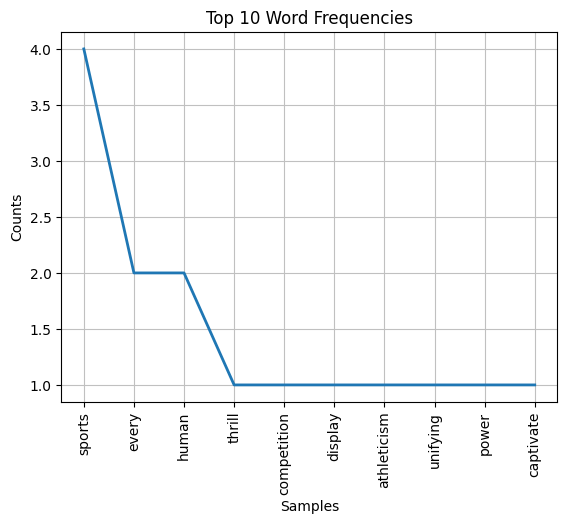

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt  # Required for plotting

corpus = '''he thrill of competition, the display of athleticism, and the unifying power of
sports captivate me. From the nail-biting finishes in basketball to the graceful movements of
figure skating, every sport offers a unique spectacle. The dedication and teamwork exhibited
 by athletes inspire me, as they push the boundaries of human potential. Whether it's the roar
  of the crowd in a packed stadium or the shared joy of victory among teammates, sports create
   unforgettable moments and emotions. I am particularly drawn to the strategic complexities of
   sports like cricket and soccer, where every decision can influence the outcome. In essence,
 sports represent a celebration of human endeavor, resilience, and the pursuit of excellence.'''

# Preprocessing
corpus = corpus.lower().translate(str.maketrans('', '', string.punctuation))

# Tokenization
word_tokens = word_tokenize(corpus)
sent_tokens = sent_tokenize(corpus)

# Stopword Removal
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in word_tokens if word not in stop_words]

# Frequency Distribution
fdist = FreqDist(filtered_words)

# Plot
fdist.plot(10, title="Top 10 Word Frequencies")  # Show top 10
plt.show()


Q2: Stemming and Lemmatization
1. Take the tokenized words from Ques on 1 (after stopword removal).
2. Apply stemming using NLTK's PorterStemmer and LancasterStemmer.
3. Apply lemmatization on using NLTK's WordNetLemmatizer.
4. Compare and display results of both techniques.

In [ ]:
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer

porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

porter_stems = [porter.stem(word) for word in filtered_words]
lancaster_stems = [lancaster.stem(word) for word in filtered_words]
lemmas = [lemmatizer.lemmatize(word) for word in filtered_words]

for w, p, l, lm in zip(filtered_words, porter_stems, lancaster_stems, lemmas):
    print(f"{w:15} | Porter: {p:15} | Lancaster: {l:15} | Lemma: {lm}")

thrill          | Porter: thrill          | Lancaster: thrill          | Lemma: thrill
competition     | Porter: competit        | Lancaster: competit        | Lemma: competition
display         | Porter: display         | Lancaster: display         | Lemma: display
athleticism     | Porter: athletic        | Lancaster: athlet          | Lemma: athleticism
unifying        | Porter: unifi           | Lancaster: un              | Lemma: unifying
power           | Porter: power           | Lancaster: pow             | Lemma: power
sports          | Porter: sport           | Lancaster: sport           | Lemma: sport
captivate       | Porter: captiv          | Lancaster: capt            | Lemma: captivate
nailbiting      | Porter: nailbit         | Lancaster: nailbit         | Lemma: nailbiting
finishes        | Porter: finish          | Lancaster: fin             | Lemma: finish
basketball      | Porter: basketbal       | Lancaster: basketbal       | Lemma: basketball
graceful        | Por

Q3. Regular Expressions and Text Splitting
1. Take their original text from Ques on 1.
2. Use regular expressions to:
a. Extract all words with more than 5 letters.
b. Extract all numbers (if any exist in their text).
c. Extract all capitalized words.
3. Use text splitting techniques to:
a. Split the text into words containing only alphabets (removing digits and special characters).
b. Extract words starting with a vowel.

In [ ]:
import re

more_than_5 = re.findall(r'\b\w{6,}\b', corpus)

numbers = re.findall(r'\b\d+\b', corpus)

capitalized = re.findall(r'\b[A-Z][a-z]*\b', corpus)

alpha_words = re.findall(r'\b[a-zA-Z]+\b', corpus)

vowel_words = [word for word in alpha_words if re.match(r'^[AEIOUaeiou]', word)]

print("Words > 5 letters:", more_than_5)
print("Numbers:", numbers)
print("Capitalized words:", capitalized)
print("Alphabetic words:", alpha_words)
print("Words starting with vowel:", vowel_words)

Words > 5 letters: ['thrill', 'competition', 'display', 'athleticism', 'unifying', 'sports', 'captivate', 'nailbiting', 'finishes', 'basketball', 'graceful', 'movements', 'figure', 'skating', 'offers', 'unique', 'spectacle', 'dedication', 'teamwork', 'exhibited', 'athletes', 'inspire', 'boundaries', 'potential', 'whether', 'packed', 'stadium', 'shared', 'victory', 'teammates', 'sports', 'create', 'unforgettable', 'moments', 'emotions', 'particularly', 'strategic', 'complexities', 'sports', 'cricket', 'soccer', 'decision', 'influence', 'outcome', 'essence', 'sports', 'represent', 'celebration', 'endeavor', 'resilience', 'pursuit', 'excellence']
Numbers: []
Capitalized words: []
Alphabetic words: ['he', 'thrill', 'of', 'competition', 'the', 'display', 'of', 'athleticism', 'and', 'the', 'unifying', 'power', 'of', 'sports', 'captivate', 'me', 'from', 'the', 'nailbiting', 'finishes', 'in', 'basketball', 'to', 'the', 'graceful', 'movements', 'of', 'figure', 'skating', 'every', 'sport', 'offe

Q4. Custom Tokenization on & Regex-based Text Cleaning
1. Take original text from Ques on 1.
2. Write a custom tokenization on func on that:
a. Removes punctuation and special symbols, but keeps contractions (e.g., "isn't" should not be split into "is" and "n't").
b. Handles hyphenated words as a single token (e.g., "state-of-the-art" remains a single token).
c. Tokenizes numbers separately but keeps decimal numbers intact (e.g., "3.14" should remain as is).

3. Use Regex Substitutions (re.sub) to:
a. Replace email addresses with '<EMAIL>' placeholder.
b. Replace URLs with '<URL>' placeholder.
c. Replace phone numbers (formats: 123-456-7890 or +91 9876543210) with '<PHONE>' placeholder.

In [ ]:
def custom_tokenize(text):
    pattern = r"\b\w+(?:-\w+)*'\w+|\b\w+(?:-\w+)*|\d+\.\d+|\d+"
    return re.findall(pattern, text)

def clean_emails(text):
    return re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w{2,4}\b', '<EMAIL>', text)

def clean_urls(text):
    return re.sub(r'https?://\S+|www\.\S+', '<URL>', text)

def clean_phones(text):
    return re.sub(r'(\+?\d{1,3}[ -]?)?\(?\d{3}\)?[ -]?\d{3}[ -]?\d{4}', '<PHONE>', text)

cleaned_text = clean_emails(corpus)
cleaned_text = clean_urls(cleaned_text)
cleaned_text = clean_phones(cleaned_text)

tokens = custom_tokenize(cleaned_text)

print("Custom Tokens:", tokens)

Custom Tokens: ['he', 'thrill', 'of', 'competition', 'the', 'display', 'of', 'athleticism', 'and', 'the', 'unifying', 'power', 'of', 'sports', 'captivate', 'me', 'from', 'the', 'nailbiting', 'finishes', 'in', 'basketball', 'to', 'the', 'graceful', 'movements', 'of', 'figure', 'skating', 'every', 'sport', 'offers', 'a', 'unique', 'spectacle', 'the', 'dedication', 'and', 'teamwork', 'exhibited', 'by', 'athletes', 'inspire', 'me', 'as', 'they', 'push', 'the', 'boundaries', 'of', 'human', 'potential', 'whether', 'its', 'the', 'roar', 'of', 'the', 'crowd', 'in', 'a', 'packed', 'stadium', 'or', 'the', 'shared', 'joy', 'of', 'victory', 'among', 'teammates', 'sports', 'create', 'unforgettable', 'moments', 'and', 'emotions', 'i', 'am', 'particularly', 'drawn', 'to', 'the', 'strategic', 'complexities', 'of', 'sports', 'like', 'cricket', 'and', 'soccer', 'where', 'every', 'decision', 'can', 'influence', 'the', 'outcome', 'in', 'essence', 'sports', 'represent', 'a', 'celebration', 'of', 'human', '